#                                              Student Marks Predictor

## 1. Business Problem

### predict the percentage of an student based on the no. of study hours.

## 1.1 Description

#### With the help of this predictor you can find out the marks of students according their study hours. 

## 2. Machine learning problem

### 2.1 data

data file name :-  student_info.csv

size of data :- 2.4 kB

source file's link:- https://drive.google.com/file/d/1gebOloJzZSQbbfrsLKbTKaM6AFz3PPZ4/view?usp=sharing




## 3. Type of machine learning problem

It is a Regression problem where we find out real interger numbers.

## 4. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib
from sklearn import svm

### 4.1 Reading data and basic stats

In [2]:
data=pd.read_csv("student_info.csv")
print("Number of data points:",data.shape[0])

Number of data points: 200


In [3]:
data.head(10)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


#### checking for null values

In [6]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

##### Replace all the null values with mean value.

In [7]:
data2=data.fillna(data.mean())

In [8]:
 data2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

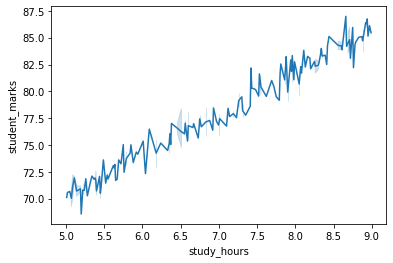

In [9]:
sns.lineplot(x="study_hours",y="student_marks",data=data2)
plt.show()

/home/sunil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


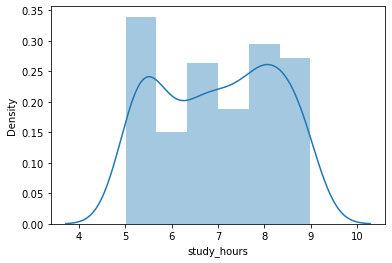

In [10]:
sns.distplot(data2["study_hours"])
plt.show()

/home/sunil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


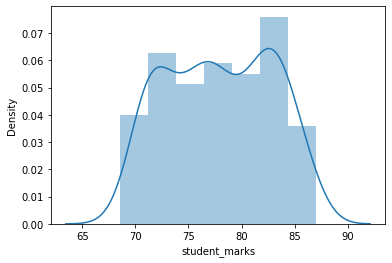

In [11]:
sns.distplot(data2["student_marks"])
plt.show()

<AxesSubplot:xlabel='study_hours', ylabel='student_marks'>

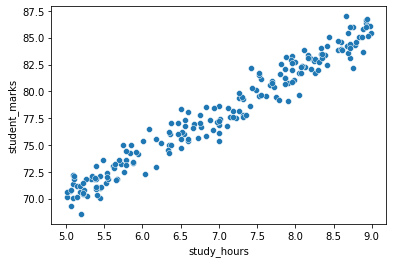

In [12]:
sns.scatterplot(x="study_hours",y="student_marks",data=data2)

### split dataset for training

In [13]:
x=data2.drop("student_marks", axis="columns")
y=data2.drop("study_hours",axis="columns")
print("shape of x",x.shape)
print("shape of y", y.shape)

shape of x (200, 1)
shape of y (200, 1)


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=51)

In [15]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (160, 1)
shape of Y Train (160, 1)
shape of X Test (40, 1)
shape of Y Test (40, 1)


### LinearRegression validation

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(X_train,Y_train)

LinearRegression()

I saved the model's coef_ and intercept in afile,so again i restart my program,and it will start from where it last time executed,and it will run till the last.

In [18]:
lr.coef_

array([[3.93571802]])

In [19]:
lr.intercept_

array([50.44735504])

In [20]:
 m= 3.93
 c= 50.44
 y= m*12+c
 y

97.6

In [21]:
lr.predict([[4]])[0][0].round(2)

66.19

In [22]:
y_pred=lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [23]:
feature_data=pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["study_hours","student_marks_original","student_marks_predicted"])

In [24]:
feature_data.head(10)

,study_hours,student_marks_original,student_marks_predicted
0,8.30,82.02,83.113815
1,7.23,77.55,78.902596
2,8.67,84.19,84.570030
3,8.99,85.46,85.829460
4,8.71,84.03,84.727459
5,7.70,80.81,80.752384
6,5.69,73.61,72.841591
7,5.39,70.90,71.660875
8,5.79,73.14,73.235162
9,5.39,73.02,71.660875


### Accuracy of model

In [25]:
print(f"{lr.score(X_test,Y_test)*100}%")

95.14124242154463%


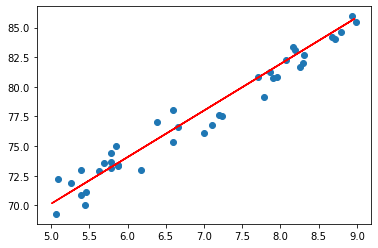

In [26]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

# output / solution

In [27]:
joblib.dump(lr,"Student_Marks_Predictor.pkl")

['Student_Marks_Predictor.pkl']

In [28]:
model=joblib.load("Student_Marks_Predictor.pkl")

In [29]:
model.predict([[12]]) #it is showing student's mark according to no. of study hour

array([[97.67597124]])